# Estimate amount of SPM that needs to be added

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cmocean
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar
import seaborn as sns

%matplotlib notebook

###### Parameters:

In [4]:
# domain dimensions:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

# results to plot:
year    = 2015
month   = 8
folder1 = '/data/brogalla/run_storage/Mn-set4-202004/ref-'+str(year)+'/'
folder2 = '/data/brogalla/run_storage/Mn-set5-202008/ref-'+str(year)+'/'
folder3 = '/data/brogalla/run_storage/Mn-nosed-202005/nosed-'+str(year)+'/'

# colours:
rivers = '#bada55'
dirty  = '#64707b'
clean  = '#cee7fd'

##### Load files:

Model results

In [5]:
file1 = 'ANHA12_EXH006_'+str(year)+'_monthly.nc'
file2 = 'ANHA12_EXH006_'+str(year)+'_monthly.nc'
file3 = 'ANHA12_EXH006_'+str(year)+'_monthly.nc'

Mn_model1 = nc.Dataset(folder1+file1)
Mn_model2 = nc.Dataset(folder2+file2)
Mn_model3 = nc.Dataset(folder3+file3)

lon_model    = np.array(Mn_model1.variables['nav_lon'])
lat_model    = np.array(Mn_model1.variables['nav_lat'])
depths_model = np.array(Mn_model1.variables['deptht'])
mn_dis1      = np.array(Mn_model1.variables['dissolmn'])
mn_dis2      = np.array(Mn_model2.variables['dissolmn'])
mn_dis3      = np.array(Mn_model3.variables['dissolmn'])

Meshes

In [6]:
mesh       = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
mesh_lon   = np.array(mesh.variables['nav_lon'])
mesh_lat   = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['hdept'][0])

In [7]:
mask     = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh_zgr10.nc')
tmask    = mask.variables['tmask']
tmask    = np.array(tmask[0,:,:,:])
mlons    = np.array(mask.variables['nav_lon'])
mlats    = np.array(mask.variables['nav_lat'])
Z_masked = np.ma.masked_where((tmask > 0.1), tmask) 

Observations

In [8]:
Mn_data  = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Mn_Integrated_Data_UBC-UVic_4-17-19.csv')

dMn_BB1  = Mn_data['BB1'].dropna()[1:].astype('float'); dMn_BB2 = Mn_data['BB2'].dropna()[1:].astype('float');
dMn_BB3  = Mn_data['BB3'].dropna()[1:].astype('float'); dMn_CB1 = Mn_data['CB1'].dropna()[1:].astype('float');
dMn_CB2  = Mn_data['CB2'].dropna()[1:].astype('float'); dMn_CB3 = Mn_data['CB3'].dropna()[1:].astype('float');
dMn_CB4  = Mn_data['CB4'].dropna()[1:].astype('float'); dMn_CAA1 = Mn_data['CAA1'].dropna()[1:].astype('float');
dMn_CAA2 = Mn_data['CAA2'].dropna()[1:].astype('float'); dMn_CAA3 = Mn_data['CAA3'].dropna()[1:].astype('float');
dMn_CAA4 = Mn_data['CAA4'].dropna()[1:].astype('float'); dMn_CAA5 = Mn_data['CAA5'].dropna()[1:].astype('float');
dMn_CAA6 = Mn_data['CAA6'].dropna()[1:].astype('float'); dMn_CAA7 = Mn_data['CAA7'].dropna()[1:].astype('float');
dMn_CAA8 = Mn_data['CAA8'].dropna()[1:].astype('float'); dMn_CAA9 = Mn_data['CAA9'].dropna()[1:].astype('float');

std_BB1  = Mn_data['Unnamed: 8'].dropna()[1:].astype('float');  std_BB2 = Mn_data['Unnamed: 11'].dropna()[1:].astype('float');
std_BB3  = Mn_data['Unnamed: 14'].dropna()[1:].astype('float'); std_CB1 = Mn_data['Unnamed: 44'][1:].astype('float').fillna(0)[0:11];
std_CB2  = Mn_data['Unnamed: 47'].dropna()[1:].astype('float'); std_CB3 = Mn_data['Unnamed: 50'][1:].astype('float').fillna(0)[0:22];
std_CB4  = Mn_data['Unnamed: 53'].dropna()[1:].astype('float'); std_CAA1 = Mn_data['Unnamed: 17'].dropna()[1:].astype('float');
std_CAA2 = Mn_data['Unnamed: 20'].dropna()[1:].astype('float'); std_CAA3 = Mn_data['Unnamed: 23'].dropna()[1:].astype('float');
std_CAA4 = Mn_data['Unnamed: 26'].dropna()[1:].astype('float'); std_CAA5 = Mn_data['Unnamed: 29'].dropna()[1:].astype('float');
std_CAA6 = Mn_data['Unnamed: 32'].dropna()[1:].astype('float'); std_CAA7 = Mn_data['Unnamed: 35'].dropna()[1:].astype('float');
std_CAA8 = Mn_data['Unnamed: 38'].dropna()[1:].astype('float'); std_CAA9 = Mn_data['Unnamed: 41'].dropna()[1:].astype('float');

depth_BB1  = Mn_data['Depth.2'].dropna(); depth_BB2 = Mn_data['Depth.3'].dropna();
depth_BB3  = Mn_data['Depth.4'].dropna(); depth_CB1 = Mn_data['Depth.14'].dropna();
depth_CB2  = Mn_data['Depth.15'].dropna(); depth_CB3 = Mn_data['Depth.16'].dropna();
depth_CB4  = Mn_data['Depth.17'].dropna(); depth_CAA1 = Mn_data['Depth.5'].dropna();
depth_CAA2 = Mn_data['Depth.6'].dropna(); depth_CAA3 = Mn_data['Depth.7'].dropna();
depth_CAA4 = Mn_data['Depth.8'].dropna(); depth_CAA5 = Mn_data['Depth.9'].dropna();
depth_CAA6 = Mn_data['Depth.10'].dropna(); depth_CAA7 = Mn_data['Depth.11'].dropna();
depth_CAA8 = Mn_data['Depth.12'].dropna(); depth_CAA9 = Mn_data['Depth.13'].dropna();

In [9]:
bottom_depths =[np.amax(d) for d in [depth_CAA1, depth_CAA2, depth_CAA3, depth_CAA4, depth_CAA5, depth_CAA6, \
                            depth_CAA7, depth_CAA8, depth_CAA9, depth_CB1, depth_CB2, depth_CB3, depth_CB4]]

In [10]:
Pb_data   = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = Pb_data['Station names'].dropna().astype('str')
lons      = Pb_data['station lon'].astype('float').dropna().values
lats      = Pb_data['Station lat'].astype('float').dropna().values

##### Define functions

In [11]:
def find_index_ANHA12_full(transect_lons, transect_lats, ANHA12_lon=mesh_lon, ANHA12_lat=mesh_lat):
    # input:   ANHA12_lon, ANHA12_lat       --- 2400x1632 coordinates
    #          transect_lons, transect_lats --- list of lat and lon values to include in the transect
    # output:  i, j                         --- lists of coordinates associated with these points
    
    transect_i = np.array([])
    transect_j = np.array([])
    if isinstance(transect_lons,float):
        i, j = ar.find_closest_model_point(transect_lons, transect_lats, ANHA12_lon, ANHA12_lat)
        transect_i = i
        transect_j = j
    else:
        for k in range(0,len(transect_lons)):
            i, j = ar.find_closest_model_point(transect_lons[k], transect_lats[k], ANHA12_lon, ANHA12_lat)
            transect_i = np.append(transect_i, i)
            transect_j = np.append(transect_j, j)
    
    return transect_i, transect_j

In [12]:
def find_index_ANHA12_sub(transect_lons, transect_lats, ANHA12sub_lon=lon_model, ANHA12sub_lat=lat_model):
    # input:   ANHA12sub_lon, ANHA12sub_lat --- 570x600 coordinates
    #          transect_lons, transect_lats --- list of lat and lon values to include in the transect
    # output:  i, j                         --- lists of coordinates associated with these points
    
    transect_i = np.array([])
    transect_j = np.array([])
    
    if isinstance(transect_lons,float):
        i, j = ar.find_closest_model_point(transect_lons, transect_lats, ANHA12sub_lon, ANHA12sub_lat)
        transect_i = i
        transect_j = j
    else:
        for k in range(0,len(transect_lons)):
            i, j = ar.find_closest_model_point(transect_lons[k], transect_lats[k], ANHA12sub_lon, ANHA12sub_lat)
            transect_i = np.append(transect_i, i)
            transect_j = np.append(transect_j, j)
    
    return transect_i, transect_j

In [13]:
def calc_scatter(name, dmn_stn, depth_stn):
    lon_station = lons[stn_names==name]
    lat_station = lats[stn_names==name]
    model_stni, model_stnj = find_index_ANHA12_sub(lon_station, lat_station)
    model_i, model_j = find_index_ANHA12_full(lon_station, lat_station)
    model_i = int(model_i); model_j = int(model_j);
    model_stni = int(model_stni); model_stnj = int(model_stnj);
    
    mn_ij1 = mn_dis1[8, 0, :, model_stni, model_stnj]*10**9
    mn_ij2 = mn_dis2[8, 0, :, model_stni, model_stnj]*10**9
    mn_ij3 = mn_dis3[8, 0, :, model_stni, model_stnj]*10**9
    mn_ij1_masked = np.ma.masked_where((tmask[:, model_i, model_j] < 0.1), mn_ij1)
    mn_ij2_masked = np.ma.masked_where((tmask[:, model_i, model_j] < 0.1), mn_ij2)
    mn_ij3_masked = np.ma.masked_where((tmask[:, model_i, model_j] < 0.1), mn_ij3)
    
    m1 = []; m2 = []; m3 = [];
    for depth_obs in depth_stn[(depth_stn < 50) & (depth_stn > 5)]:
        d1 = np.argmin(np.abs(depths_model-depth_obs))
        m1.append(mn_ij1_masked[d1])
        m2.append(mn_ij2_masked[d1])
        m3.append(mn_ij3_masked[d1])
    
    dmn_m1  = m1; dmn_m2  = m2; dmn_m3  = m3;
    dmn_obs = list(dmn_stn[(depth_stn < 50) & (depth_stn > 5)])
    
    return dmn_m1, dmn_m2, dmn_m3, dmn_obs

#### Figure:

In [14]:
dmn_m1CAA1, dmn_m2CAA1, dmn_m3CAA1, dmn_obCAA1 = calc_scatter('CAA1', dMn_CAA1, depth_CAA1)
dmn_m1CAA2, dmn_m2CAA2, dmn_m3CAA2, dmn_obCAA2 = calc_scatter('CAA2', dMn_CAA2, depth_CAA2)
dmn_m1CAA3, dmn_m2CAA3, dmn_m3CAA3, dmn_obCAA3 = calc_scatter('CAA3', dMn_CAA3, depth_CAA3)
dmn_m1CAA4, dmn_m2CAA4, dmn_m3CAA4, dmn_obCAA4 = calc_scatter('CAA4', dMn_CAA4, depth_CAA4)
dmn_m1CAA5, dmn_m2CAA5, dmn_m3CAA5, dmn_obCAA5 = calc_scatter('CAA5', dMn_CAA5, depth_CAA5)
dmn_m1CAA6, dmn_m2CAA6, dmn_m3CAA6, dmn_obCAA6 = calc_scatter('CAA6', dMn_CAA6, depth_CAA6)
dmn_m1CAA7, dmn_m2CAA7, dmn_m3CAA7, dmn_obCAA7 = calc_scatter('CAA7', dMn_CAA7, depth_CAA7)
dmn_m1CAA8, dmn_m2CAA8, dmn_m3CAA8, dmn_obCAA8 = calc_scatter('CAA8', dMn_CAA8, depth_CAA8)
dmn_m1CAA9, dmn_m2CAA9, dmn_m3CAA9, dmn_obCAA9 = calc_scatter('CAA9', dMn_CAA9, depth_CAA9)

dmn_m1CB1, dmn_m2CB1, dmn_m3CB1, dmn_obCB1 = calc_scatter('CB1', dMn_CB1, depth_CB1)
dmn_m1CB2, dmn_m2CB2, dmn_m3CB2, dmn_obCB2 = calc_scatter('CB2', dMn_CB2, depth_CB2)
dmn_m1CB3, dmn_m2CB3, dmn_m3CB3, dmn_obCB3 = calc_scatter('CB3', dMn_CB3, depth_CB3)
dmn_m1CB4, dmn_m2CB4, dmn_m3CB4, dmn_obCB4 = calc_scatter('CB4', dMn_CB4, depth_CB4)

In [15]:
dmn_dirty = dmn_m1CAA1 + dmn_m1CAA2 + dmn_m1CAA3 + dmn_m1CAA4 + dmn_m1CAA5 + \
            dmn_m1CAA6 + dmn_m1CAA7 + dmn_m1CAA8 + dmn_m1CAA9 + dmn_m1CB1 + \
            dmn_m1CB2  + dmn_m1CB3  + dmn_m1CB4
dmn_dirty_CB = dmn_m1CB1 + dmn_m1CB2  + dmn_m1CB3  + dmn_m1CB4

dmn_clean = dmn_m3CAA1 + dmn_m3CAA2 + dmn_m3CAA3 + dmn_m3CAA4 + dmn_m3CAA5 + \
            dmn_m3CAA6 + dmn_m3CAA7 + dmn_m3CAA8 + dmn_m3CAA9 + dmn_m3CB1 + \
            dmn_m3CB2  + dmn_m3CB3  + dmn_m3CB4
dmn_clean_CB = dmn_m3CB1 + dmn_m3CB2  + dmn_m3CB3  + dmn_m3CB4

dmn_rivers = dmn_m2CAA1 + dmn_m2CAA2 + dmn_m2CAA3 + dmn_m2CAA4 + dmn_m2CAA5 + \
            dmn_m2CAA6 + dmn_m2CAA7 + dmn_m2CAA8 + dmn_m2CAA9 + dmn_m2CB1 + \
            dmn_m2CB2  + dmn_m2CB3  + dmn_m2CB4
dmn_rivers_CB = dmn_m2CB1 + dmn_m2CB2  + dmn_m2CB3  + dmn_m2CB4

dmn_observ = dmn_obCAA1 + dmn_obCAA2 + dmn_obCAA3 + dmn_obCAA4 + dmn_obCAA5 + \
             dmn_obCAA6 + dmn_obCAA7 + dmn_obCAA8 + dmn_obCAA9 + dmn_obCB1 + \
             dmn_obCB2  + dmn_obCB3  + dmn_obCB4
dmn_observ_CB = dmn_obCB1 + dmn_obCB2  + dmn_obCB3  + dmn_obCB4

delta_dmn_ice    = np.array(dmn_dirty)  - np.array(dmn_clean)
delta_dmn_rivers = np.array(dmn_rivers) - np.array(dmn_dirty)
dmn_clean_rivers = np.array(dmn_rivers) - delta_dmn_ice

In [32]:
dmn_dirty_continental = dmn_m1CB4 + dmn_m1CB3 + dmn_m1CB2 + dmn_m1CB1 + dmn_m1CAA8 + dmn_m1CAA6 + dmn_m1CAA7 +\
                        dmn_m1CAA5 + dmn_m1CAA4
dmn_clean_continental = dmn_m3CB4 + dmn_m3CB3 + dmn_m3CB2 + dmn_m3CB1 + dmn_m3CAA8 + dmn_m3CAA6 + dmn_m3CAA7 +\
                        dmn_m3CAA5 + dmn_m3CAA4
dmn_river_continental = dmn_m2CB4 + dmn_m2CB3 + dmn_m2CB2 + dmn_m2CB1 + dmn_m2CAA8 + dmn_m2CAA6 + dmn_m2CAA7 +\
                        dmn_m2CAA5 + dmn_m2CAA4

dmn_dirty_glacial = dmn_m1CAA1 + dmn_m1CAA9 + dmn_m1CAA2 + dmn_m1CAA3
dmn_clean_glacial = dmn_m3CAA1 + dmn_m3CAA9 + dmn_m3CAA2 + dmn_m3CAA3
dmn_river_glacial = dmn_m2CAA1 + dmn_m2CAA9 + dmn_m2CAA2 + dmn_m2CAA3


dmn_obs_continental = dmn_obCB4 + dmn_obCB3 + dmn_obCB2 + dmn_obCB1 + dmn_obCAA8 + dmn_obCAA6 + dmn_obCAA7 +\
                        dmn_obCAA5 + dmn_obCAA4
dmn_obs_glacial     = dmn_obCAA1 + dmn_obCAA9 + dmn_obCAA2 + dmn_obCAA3

Estimate SPM contribution objectively:

In [49]:
def willmott_score(Obs, Pred):
    N = np.count_nonzero(~np.isnan(Obs))
    
    numerator   = np.sum([(Pred[i]-Obs[i])**2 for i in range(0,N)])
    term1       = np.abs(Pred - np.nanmean(Pred))
    term2       = np.abs(Obs - np.nanmean(Obs))
    denominator = np.sum([(term1[i]+term2[i])**2 for i in range(0,N)])
    deviation   = numerator / denominator
    
    willmott    = 1 - deviation
#     print('Willmott skill score: ', willmott)
        
    return willmott

In [48]:
willmott_score(dmn_obs_continental, dmn_river_continental)
willmott_score(dmn_obs_continental, dmn_dirty_continental)
willmott_score(dmn_obs_continental, dmn_clean_continental)
print('----------------------------------------------------')
willmott_score(dmn_obs_glacial, dmn_river_glacial)
willmott_score(dmn_obs_glacial, dmn_dirty_glacial)
willmott_score(dmn_obs_glacial, dmn_clean_glacial)

Willmott skill score:  0.6985148881004037
Willmott skill score:  0.7122914202031392
Willmott skill score:  -1.035796800792978
----------------------------------------------------
Willmott skill score:  0.302800654434224
Willmott skill score:  0.539344385800288
Willmott skill score:  -0.7178086120164513


-0.7178086120164513

In [45]:
delta_dmn_rivers_glacial = np.array(dmn_river_glacial) - np.array(dmn_dirty_glacial)

willmotts = []
a_values  = np.linspace(-5,10,1000)

for a in a_values:
    dmn_test = dmn_dirty_glacial + a*delta_dmn_rivers_glacial
    w = willmott_score(dmn_obs_glacial, dmn_test)
    
    willmotts.append(w)

In [39]:
score_rivers = willmott_score(dmn_observ, dmn_rivers)
score_dirty  = willmott_score(dmn_observ, dmn_dirty)
score_clean  = willmott_score(dmn_observ, dmn_clean)
score_observ = willmott_score(dmn_observ, dmn_clean_rivers)

Willmott skill score:  0.5989076167414737
Willmott skill score:  0.6678275162550216
Willmott skill score:  -0.8603375040417978
Willmott skill score:  0.4260415462959237


In [31]:
willmotts = []
a_values  = np.linspace(-5,10,1000)

for a in a_values:
    dmn_test = dmn_dirty + a*delta_dmn_rivers
    w = willmott_score(dmn_observ, dmn_test)
    
    willmotts.append(w)

In [42]:
ind_max = np.argmax(willmotts)
a_best  = a_values[ind_max]
willmotts = np.array(willmotts)
print('Best fit SPM content: ', a_best)
print('Associated Willmott score: ', willmotts[ind_max])

Best fit SPM content:  0.2852852852852852
Associated Willmott score:  0.6039225281261863


<IPython.core.display.Javascript object>


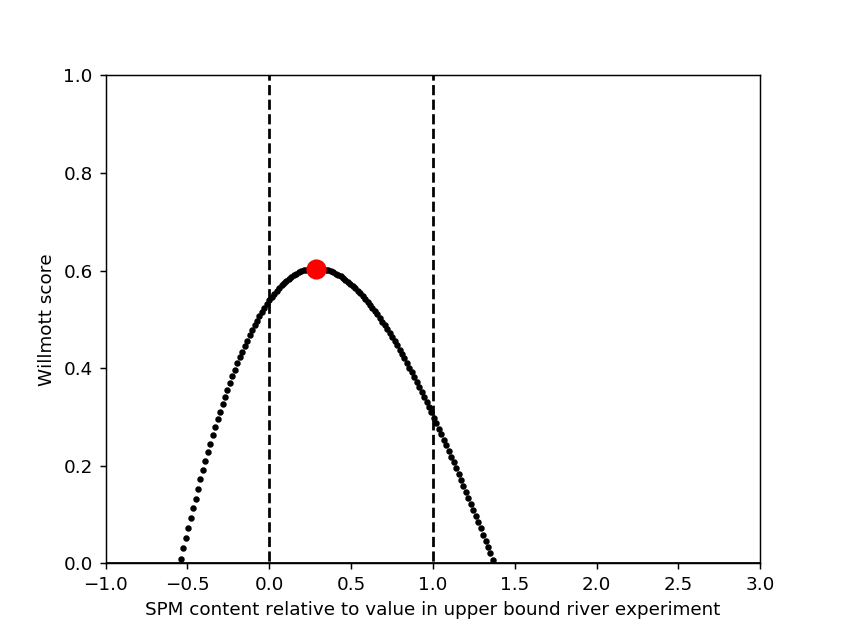

(-1, 3)

In [43]:
fig, ax = plt.subplots(1,1)

ax.plot(a_values, willmotts, '.k', markersize=5)
ax.plot([0,0], [-10,10], '--k')
ax.plot([1,1], [-10,10], '--k')
ax.plot([-10,10], [0,0], '-k')
ax.plot(a_best, willmotts[ind_max], '.r', markersize=20)

ax.set_xlabel('SPM content relative to value in upper bound river experiment')
ax.set_ylabel('Willmott score')
ax.set_ylim(0,1)
ax.set_xlim(-1,3)

<IPython.core.display.Javascript object>


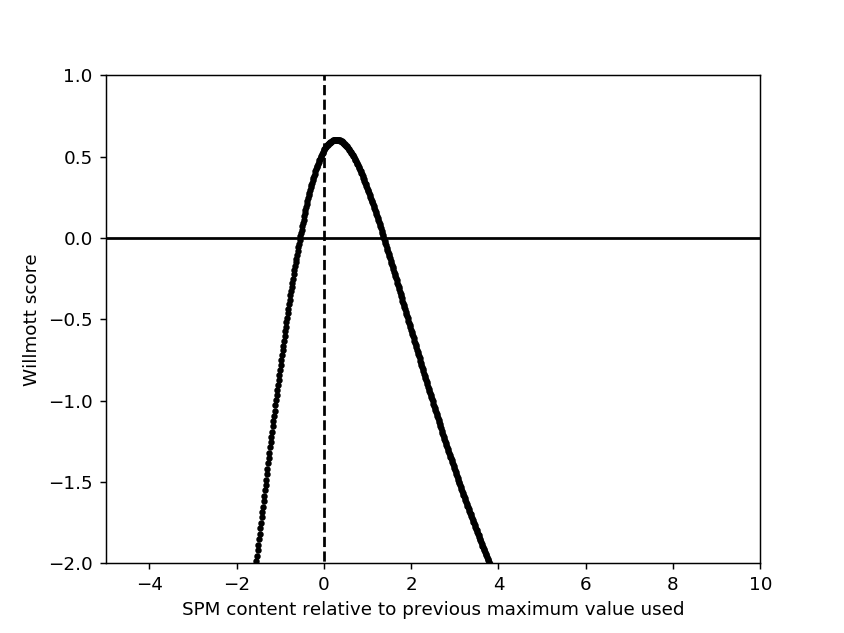

(-5, 10)

In [26]:
fig, ax = plt.subplots(1,1)

ax.plot(a_values, willmotts, '.k', markersize=5)
ax.plot([0,0], [-10,10], '--k')
ax.plot([-10,10], [0,0], '-k')

ax.set_xlabel('SPM content relative to previous maximum value used')
ax.set_ylabel('Willmott score')
ax.set_ylim(-2,1)
ax.set_xlim(-5,10)

In [35]:
dmn_best = dmn_dirty + a_best*delta_dmn_rivers

<IPython.core.display.Javascript object>


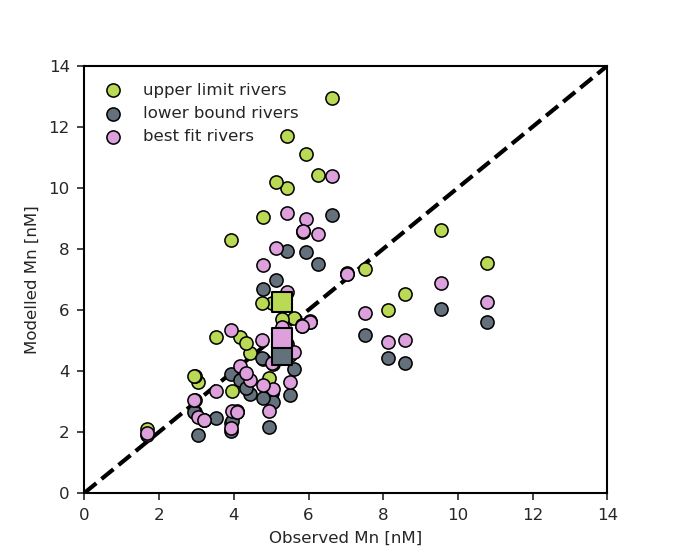

In [36]:
fig = plt.figure(figsize=(6,5))
st  = sns.axes_style("ticks")

with st:
    ax = sns.lineplot([0, 20],[0, 20], c='k', linewidth=2.0, zorder=1)
    ax.lines[0].set_linestyle('--')
    
#     sns.scatterplot(dmn_observ, dmn_clean_rivers, label=r'No sediment in sea ice, upper limit rivers', s=40, edgecolor='k', color='r', zorder=2)
    sns.scatterplot(dmn_observ, dmn_rivers, label=r'upper limit rivers', s=40, edgecolor='k', color=rivers, zorder=2)
    sns.scatterplot(dmn_observ, dmn_dirty, label=r'lower bound rivers', s=40, edgecolor='k', color=dirty, zorder=2)
    sns.scatterplot(dmn_observ, dmn_best, label=r'best fit rivers', s=40, edgecolor='k', color='#dda0dd', zorder=2)
    
#     sns.scatterplot([np.mean(dmn_observ)], [np.mean(dmn_clean_rivers)], s=100, linewidth=1.0, edgecolor='k', marker='s', color='r', zorder=3)
    sns.scatterplot([np.mean(dmn_observ)], [np.mean(dmn_rivers)], s=100, linewidth=1.0, edgecolor='k', marker='s', color=rivers, zorder=3)
    sns.scatterplot([np.mean(dmn_observ)], [np.mean(dmn_dirty)], s=100, linewidth=1.0, edgecolor='k', marker='s', color=dirty, zorder=3)
    sns.scatterplot([np.mean(dmn_observ)], [np.mean(dmn_best)], s=100, linewidth=1.0, edgecolor='k', marker='s', color='#dda0dd', zorder=3)

    ax.set_xlabel('Observed Mn [nM]', fontsize=8)
    ax.set_ylabel('Modelled Mn [nM]',fontsize=8)
    ax.set(xlim=(0, 14.), ylim=(0, 14.))
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.legend(loc=(0.01, 0.8), frameon=False, fontsize=8)
    
    ax.spines['left'].set_linewidth(1.0);   ax.spines['left'].set_color('black');
    ax.spines['bottom'].set_linewidth(1.0); ax.spines['bottom'].set_color('black');
    ax.spines['right'].set_linewidth(1.0);  ax.spines['right'].set_color('black');
    ax.spines['top'].set_linewidth(1.0);    ax.spines['top'].set_color('black');    
    
figure = plt.gcf()
figure.set_size_inches(4.5, 3.7)
# figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1/R3-model-vs-observations-3.png', \
#                bbox_inches='tight', dpi=300, transparent=True)
# # figure.savefig('/ocean/brogalla/GEOTRACES/figures/paper1/R3-model-vs-observations.svg', \
# #                bbox_inches='tight', dpi=300, format='svg')